In [ ]:
#assignment 7

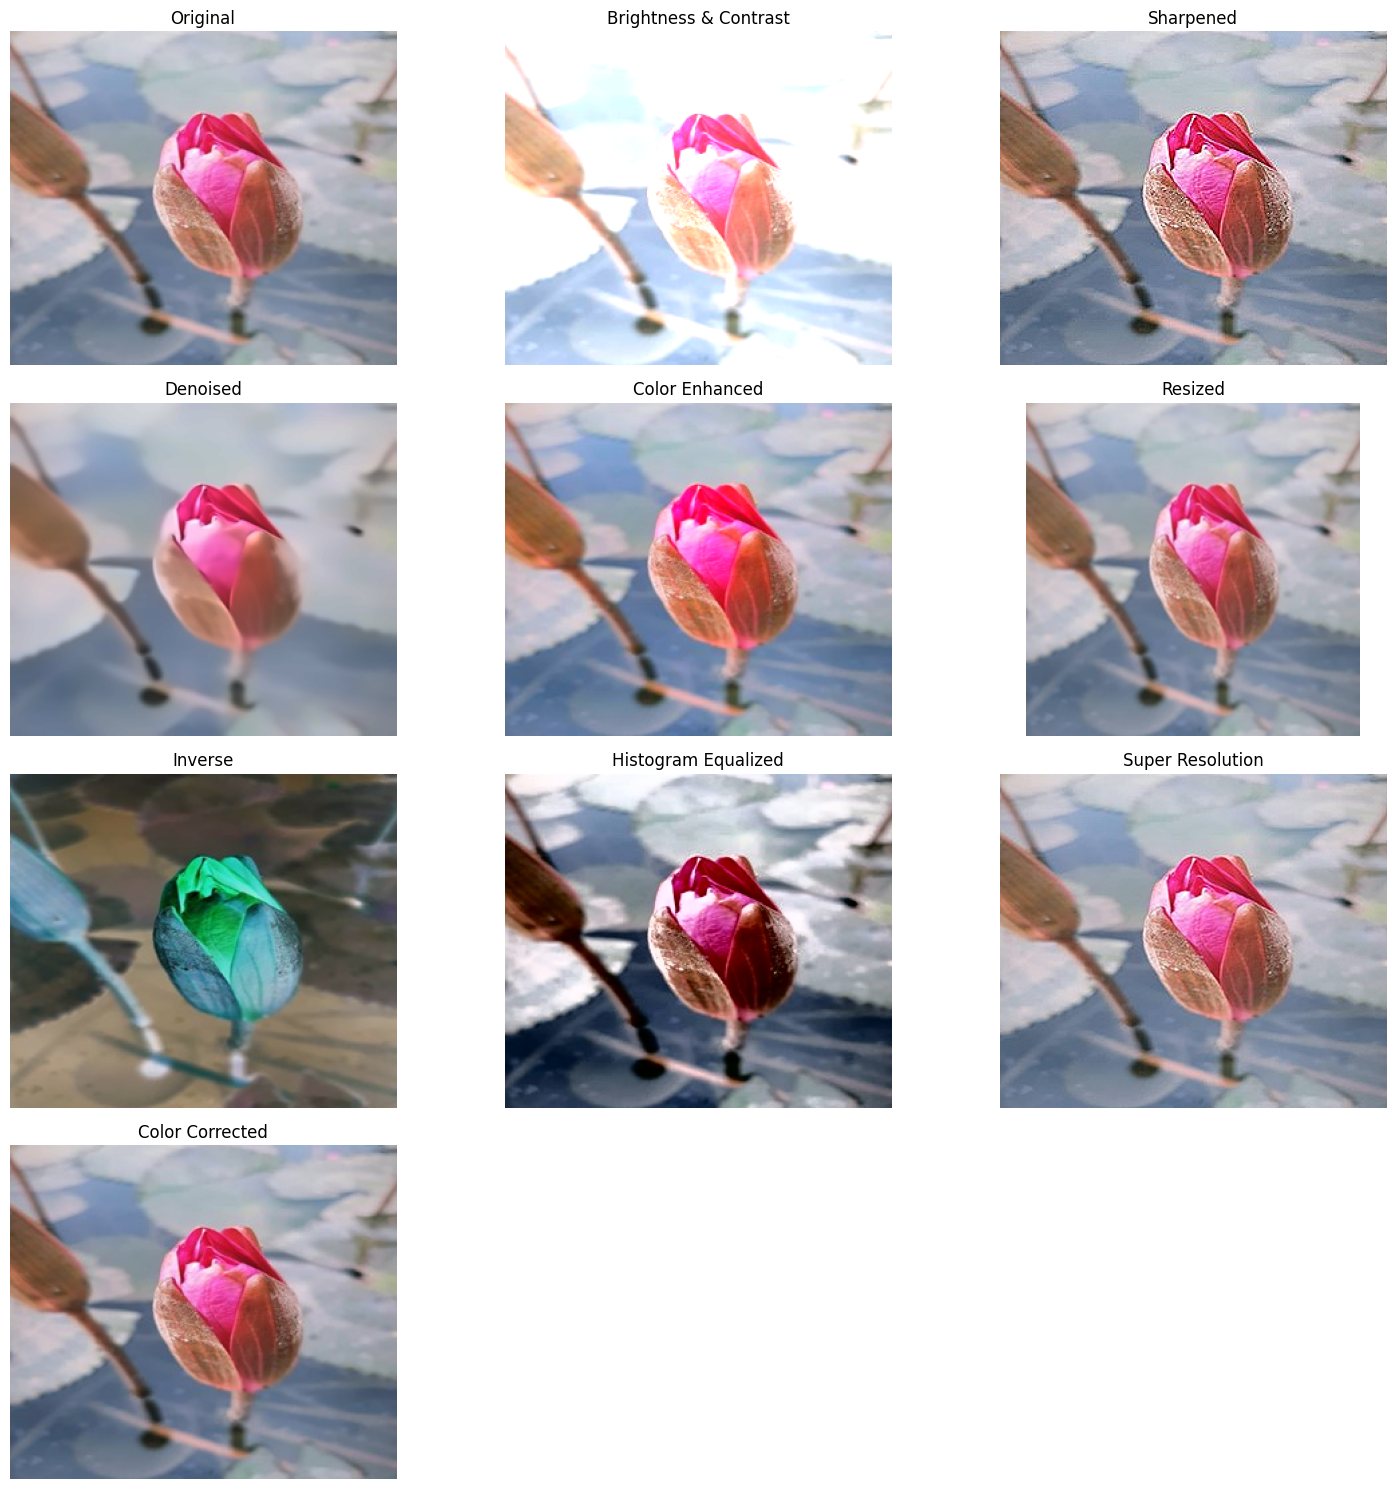

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, blob_log, blob_dog
from PIL import Image, ImageEnhance

enhance_image_path = '/content/Picture5.jpg'       # For image enhancement
blob_image1_path = '/content/Picture1.jpg'           # For blob detection
blob_image2_path = '/content/Picture2.jpg'           # For blob detection


image = cv2.imread(enhance_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ---------- 1. Adjust Brightness and Contrast ----------
alpha = 1.5  # Contrast
beta = 30    # Brightness
bright_contrast_img = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# ---------- 2. Sharpening ----------
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened_img = cv2.filter2D(image_rgb, -1, kernel)

# ---------- 3. Noise Removal ----------
denoised_img = cv2.fastNlMeansDenoisingColored(image_rgb, None, 10, 10, 7, 21)

# ---------- 4. Color Enhancement ----------
enhancer = ImageEnhance.Color(Image.fromarray(image_rgb))
color_enhanced_img = np.array(enhancer.enhance(1.5))

# ---------- 5. Image Resizing and Scaling ----------
resized_img = cv2.resize(image_rgb, (512, 512), interpolation=cv2.INTER_LINEAR)

# ---------- 6. Inverse Transform (Negative) ----------
inverse_img = cv2.bitwise_not(image_rgb)

# ---------- 7. Histogram Equalization ----------
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
hist_eq_img = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# ---------- 8. Super-resolution (Upscale + Sharpen) ----------
sr_img = cv2.resize(image_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
sr_img = cv2.filter2D(sr_img, -1, kernel)

# ---------- 9. Color Correction (Gamma correction) ----------
gamma = 1.2
gamma_corrected = np.power(image_rgb / 255.0, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

# ------------------ DISPLAY ENHANCEMENTS -----------------
titles = ['Original', 'Brightness & Contrast', 'Sharpened', 'Denoised', 'Color Enhanced',
          'Resized', 'Inverse', 'Histogram Equalized', 'Super Resolution', 'Color Corrected']

images = [image_rgb, bright_contrast_img, sharpened_img, denoised_img, color_enhanced_img,
          resized_img, inverse_img, hist_eq_img, sr_img, gamma_corrected]

plt.figure(figsize=(15,15))
for i in range(len(images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, blob_log, blob_dog
from skimage.color import rgb2gray
import os

def detect_blobs_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1):
    return blob_log(image_gray, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold)

def detect_blobs_dog(image_gray, max_sigma=30, threshold=0.1):
    return blob_dog(image_gray, max_sigma=max_sigma, threshold=threshold)

def draw_blobs(image, blobs, color):
    img_copy = image.copy()
    for blob in blobs:
        y, x, r = blob
        radius = int(r * np.sqrt(2))  # Scale correction
        cv2.circle(img_copy, (int(x), int(y)), radius, color, 2)
    return img_copy

def compute_hog(image_rgb):
    gray = rgb2gray(image_rgb)
    features, hog_image = hog(gray, visualize=True, block_norm='L2-Hys')
    return hog_image

def blob_detection(image_path, max_sigma=30, num_sigma=10, threshold=0.1):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    # LoG Blob Detection
    log_blobs = detect_blobs_log(gray, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold)
    log_img = draw_blobs(img_rgb, log_blobs, (255, 0, 0))  # Blue

    # DoG Blob Detection
    dog_blobs = detect_blobs_dog(gray, max_sigma=max_sigma, threshold=threshold)
    dog_img = draw_blobs(img_rgb, dog_blobs, (0, 255, 0))  # Green

    # HOG Features
    hog_image = compute_hog(img_rgb)

    # DISPLAY
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Blob Detection and HOG Features\n{os.path.basename(image_path)}', fontsize=16)

    plt.subplot(1, 3, 1)
    plt.imshow(log_img)
    plt.title(f'LoG Blobs: {len(log_blobs)}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(dog_img)
    plt.title(f'DoG Blobs: {len(dog_blobs)}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Run on your images
blob_img1 = '/content/Picture1.jpg'
blob_img2 = '/content/Picture2.jpg'

blob_detection(blob_img1)
blob_detection(blob_img2)


In [ ]:
pip install torch torchvision deeplake


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
pip install deeplake<4

/bin/bash: line 1: 4: No such file or directory


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
import time
from sklearn.metrics import accuracy_score

# Step 1: Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Data Preparation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required input size for pretrained models
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 3: Load Pretrained Models and Modify Classifier
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)
alexnet = alexnet.to(device)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16 = vgg16.to(device)

# Step 4: Training Function
def train_model(model, train_loader, num_epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"[{epoch+1}/{num_epochs}] Loss: {running_loss/len(train_loader):.4f}")
    return model

# Step 5: Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    end_time = time.time()
    accuracy = accuracy_score(y_true, y_pred)
    inference_time = end_time - start_time
    return accuracy, inference_time

# Step 6: Train & Evaluate Models
print("Training AlexNet:")
alexnet = train_model(alexnet, train_loader)
alexnet_acc, alexnet_time = evaluate_model(alexnet, test_loader)

print("\nTraining VGG16:")
vgg16 = train_model(vgg16, train_loader)
vgg16_acc, vgg16_time = evaluate_model(vgg16, test_loader)

# Step 7: Results Comparison
print("\n=== Performance Comparison ===")
print(f"{'Model':<10} {'Accuracy':<10} {'Inference Time (s)':<20}")
print(f"{'AlexNet':<10} {alexnet_acc:.4f} {alexnet_time:.2f}")
print(f"{'VGG16':<10} {vgg16_acc:.4f} {vgg16_time:.2f}")


100%|██████████| 169M/169M [00:02<00:00, 77.8MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 119MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'we

Training AlexNet:
[1/5] Loss: 2.1895
